# *Importing Modules*

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

# *Compute Distance*

In [2]:
def Compute_distance(row1,row2):
    distance=0
    for i in range(len(row1)):
        distance += (row1[i]-row2[i])**2
    return np.sqrt(distance)
Compute_distance([1,2,3],[4,5,6])

5.196152422706632

# *Compute All Distance*

In [6]:
def Compute_All_Distance(df,row):
    distance_dictionary={}
    m=len(df) #number of rows
    for i in range(m):
        distance_dictionary.setdefault(i,Compute_distance(row,df[i]))
    return distance_dictionary

distance_dic=Compute_Nearest_Neigbours([[2.7810836,2.550537003,0],
 [1.465489372,2.362125076,0],
 [3.396561688,4.400293529,0],
 [1.38807019,1.850220317,0],
 [3.06407232,3.005305973,0],
 [7.627531214,2.759262235,1],
 [5.332441248,2.088626775,1],
 [6.922596716,1.77106367,1],
 [8.675418651,-0.242068655,1],
 [7.673756466,3.508563011,1]],[1.243,2.345])

# *Get the minimum K indices*

In [9]:
def Get_the_minimum_K_indices(distance_dic, k):
    new_dic = dict(sorted(distance_dic.items(), key=lambda item: item[1]))
    return list(new_dic.keys())[:k]
Get_the_minimum_K_indices(distance_dic,3)

[1, 3, 0]

# *Get Prediction*

In [13]:
def Get_prediction_classification(my_list, list_of_indices):
    classification_dic = {}
    for index in list_of_indices:
        label = my_list[index][-1]
        classification_dic[label] = classification_dic.get(label, 0) + 1

    max_count = 0
    predicted_label = None
    for label, count in classification_dic.items():
        if count > max_count:
            max_count = count
            predicted_label = label

    return predicted_label

Get_prediction_classification([[2.7810836,2.550537003,0],
 [1.465489372,2.362125076,0],
 [3.396561688,4.400293529,0],
 [1.38807019,1.850220317,0],
 [3.06407232,3.005305973,0],
 [7.627531214,2.759262235,1],
 [5.332441248,2.088626775,1],
 [6.922596716,1.77106367,1],
 [8.675418651,-0.242068655,1],
 [7.673756466,3.508563011,1]],Get_the_minimum_K_indices(distance_dic,4))

0

In [14]:
def Get_prediction_regression(my_list,list_of_indicies):
    return np.mean([my_list[item][-1] for item in list_of_indicies])

Get_prediction_regression([[2.7810836,2.550537003,13.5],
 [1.465489372,2.362125076,14.2],
 [3.396561688,4.400293529,15.7],
 [1.38807019,1.850220317,17.2],
 [3.06407232,3.005305973,20.8],
 [7.627531214,2.759262235,40],
 [5.332441248,2.088626775,41],
 [6.922596716,1.77106367,16],
 [8.675418651,-0.242068655,17],
 [7.673756466,3.508563011,31.7]],Get_the_minimum_K_indices(distance_dic,4))

16.425

# *Graph* 

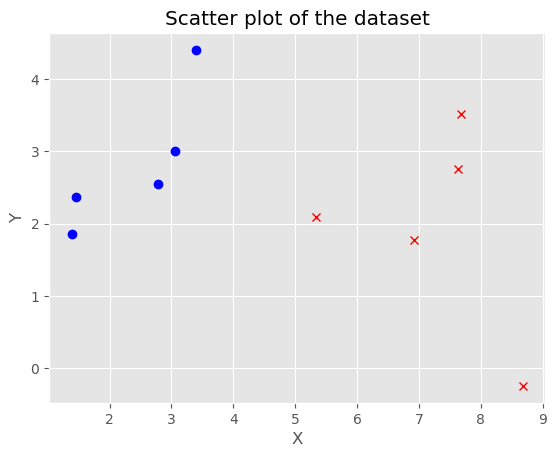

In [18]:
my_list = [[2.7810836, 2.550537003, 0],
           [1.465489372, 2.362125076, 0],
           [3.396561688, 4.400293529, 0],
           [1.38807019, 1.850220317, 0],
           [3.06407232, 3.005305973, 0],
           [7.627531214, 2.759262235, 1],
           [5.332441248, 2.088626775, 1],
           [6.922596716, 1.77106367, 1],
           [8.675418651, -0.242068655, 1],
           [7.673756466, 3.508563011, 1]]

x = [point[0] for point in my_list]
y = [point[1] for point in my_list]

plt.style.use('ggplot')
for point in my_list:
    if point[-1] == 1:
        plt.plot(point[0], point[1], marker='x', color='red')  # Class 1
    else:
        plt.plot(point[0], point[1], marker='o', color='blue')  # Class 0

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of the dataset')
plt.show()


# *After Putting The Test Point*

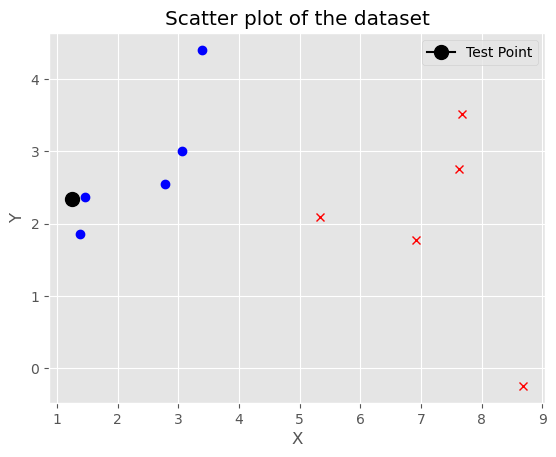

In [24]:
for point in my_list:
    if point[-1] == 1:
        plt.plot(point[0], point[1], marker='x', color='red')  # Class 1
    else:
        plt.plot(point[0], point[1], marker='o', color='blue')  # Class 0

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of the dataset')
plt.plot(1.243, 2.345, color='black', marker='o', markersize=10, label='Test Point')
plt.legend()
plt.show()